## Tidy dataset

Available here:
https://www.jstatsoft.org/article/view/2168

In [1]:
import pandas
import matplotlib
from matplotlib import pyplot
import seaborn
%matplotlib inline

### The un-tidy dataset

In [2]:
df = pandas.read_csv('../data/misc/tidy/billboard.csv')
df[:3]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Tidy-ing up

In [3]:
# which columns do you want to split up into separate rows?
value_cols = [c for c in df.columns if c.endswith('.week')]
value_cols[:5]

['x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week', 'x5th.week']

In [4]:
# what's the compound primary key for each row in the un-tidy table?
id_cols = [c for c in df.columns if not c.endswith('.week')]
id_cols

['year',
 'artist.inverted',
 'track',
 'time',
 'genre',
 'date.entered',
 'date.peaked']

In [5]:
tidy_df = pandas.melt(df, value_vars=value_cols, id_vars=id_cols, value_name='place')
tidy_df[:3]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,place
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0


### Using the tidy format

In [6]:
first_places = tidy_df[tidy_df.place == 1]
first_places[:10]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,variable,place
1588,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x6th.week,1.0
1905,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x7th.week,1.0
2222,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x8th.week,1.0
2227,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x8th.week,1.0
2230,2000,"Aguilera, Christina",What A Girl Wants,3:18,Rock,1999-11-27,2000-01-15,x8th.week,1.0
2536,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x9th.week,1.0
2537,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x9th.week,1.0
2539,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x9th.week,1.0
2544,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,x9th.week,1.0
2547,2000,"Aguilera, Christina",What A Girl Wants,3:18,Rock,1999-11-27,2000-01-15,x9th.week,1.0


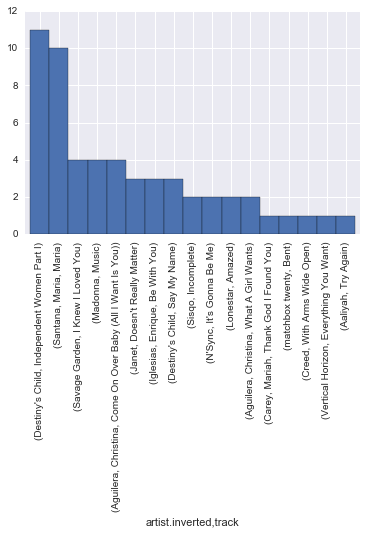

In [7]:
# who spent the most time at the top?
(first_places.groupby(['artist.inverted', 'track'])
     .size()
     .sort_values(ascending=False)
     .plot(kind='bar', width=1))

In [8]:
# who had the most top songs?
first_places.groupby(['artist.inverted']).track.nunique().sort_values(ascending=False)

artist.inverted
Destiny's Child        2
Aguilera, Christina    2
matchbox twenty        1
Vertical Horizon       1
Sisqo                  1
Savage Garden          1
Santana                1
N'Sync                 1
Madonna                1
Lonestar               1
Janet                  1
Iglesias, Enrique      1
Creed                  1
Carey, Mariah          1
Aaliyah                1
Name: track, dtype: int64

In [9]:
# can also save your groupby objects
artist_gb = tidy_df.groupby('artist.inverted')
artist_gb

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1175cd190>]], dtype=object)

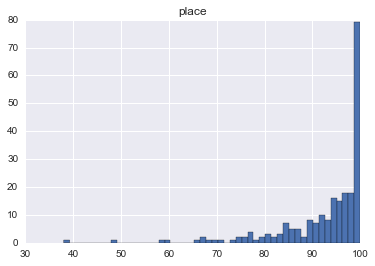

In [10]:
artist_gb.agg(dict(place=lambda places: max(places))).hist(bins=50)

In [11]:
artist_max_rank = artist_gb.agg(dict(place=lambda places: places.max()))
artist_max_rank['max_rank'] = artist_max_rank['place']
del artist_max_rank['place']
artist_max_rank[:3]

,max_rank
artist.inverted,
2 Pac,99.0
2Ge+her,92.0
3 Doors Down,81.0


In [12]:
artist_min_rank = artist_gb.agg(dict(place=lambda places: places.min()))
artist_min_rank['min_rank'] = artist_min_rank['place']
del artist_min_rank['place']
artist_min_rank[:3]

,min_rank
artist.inverted,
2 Pac,72.0
2Ge+her,87.0
3 Doors Down,3.0


In [13]:
artist_df = pandas.concat([artist_min_rank, artist_max_rank], axis=1)
artist_df[:3]

,min_rank,max_rank
artist.inverted,,
2 Pac,72.0,99.0
2Ge+her,87.0,92.0
3 Doors Down,3.0,81.0


In [14]:
artist_df['climb'] = artist_df.max_rank - artist_df.min_rank
artist_df[:3]

,min_rank,max_rank,climb
artist.inverted,,,
2 Pac,72.0,99.0,27.0
2Ge+her,87.0,92.0,5.0
3 Doors Down,3.0,81.0,78.0


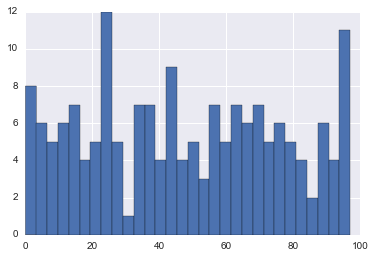

In [15]:
artist_df[artist_df.max_rank >= 90].climb.hist(bins=30)

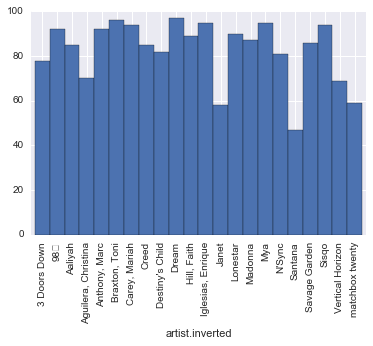

In [16]:
artist_df[artist_df.min_rank <= 3].climb.plot(kind='bar', width=1)